<div style="text-align: center; padding: 10px; background-color: #1e1e1e; color: white;">
   <img src="../Input/addthis1200x630.PNG" 
        width="400px" 
        alt="Logo Konrad Lorenz"
        style="margin: 15px auto; display: block;"/>
   <h3 style="margin-top: 10px; color: white;">Fundación Universitaria Konrad Lorenz </h3>
   <hr style="width: 60%; margin: 10px auto; border-color: #555;">
   <div style="font-size: 14px; line-height: 1.5;">
       <p><b>Proyecto:</b> EDA para variables Numéricas</p>
       <p><b>Autor:</b> Carlos Daniel Amortegui Ferrer</p>
       <p><b>Facultad:</b> Maestría & Especialización en Analítica Estratégica de Datos</p>
       <p><b>Asignatura:</b> Machine Learning Probabilístico</p>
       <p><b>Correo:</b> carlosd.amorteguif@konradlorenz.edu.co </p>
       <p><b>Fecha:</b> 03/02/2025</p>
   </div>
   <hr style="width: 60%; margin: 10px auto; border-color: #555;">
</div>

# **Librerias**

In [111]:
# =============================================================================
# LIBRERÍAS NECESARIAS
# =============================================================================

# Tratamiento de datos
# -----------------------------------------------------------------------------
import numpy as np          # Manejo de arrays y operaciones numéricas eficientes
import pandas as pd         # Manipulación y análisis de datos estructurados
from tabulate import tabulate   # Formateo de tablas para mejor visualización
from scipy import stats

# Gráficos
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt         # Librería base para visualizaciones
from matplotlib import style           # Estilos para gráficos
import matplotlib.ticker as ticker     # Formateo de ejes en gráficos
import seaborn as sns                 # Visualizaciones estadísticas avanzadas
import statsmodels.api as sm          # Modelos estadísticos y econométricos

# Configuración matplotlib
# -----------------------------------------------------------------------------
plt.rcParams['image.cmap'] = "bwr"    # Configura el mapa de colores predeterminado
plt.rcParams['savefig.bbox'] = "tight"  # Ajusta los márgenes al guardar figuras
style.use('ggplot') or plt.style.use('ggplot')  # Establece estilo visual ggplot

# Configuración warnings
# -----------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')  # Desactiva mensajes de advertencia
# pd.options.display.float_format = '{:.2f}'.format # Suprimir notación cientifica en python

# Conjunto de datos SaratogaHouses - Análisis de Precios de Viviendas

## Descripción del Dataset
El conjunto de datos `SaratogaHouses` es una base de datos de bienes raíces que contiene información sobre 1,728 viviendas vendidas en Saratoga County, Nueva York, durante el año 2006. Es un conjunto de datos muy interesante para análisis inmobiliario y modelado estadístico.

## Variables del Dataset

### 1. Variables de precio y valor
- `price`: El precio de venta de la casa en dólares
- `landValue`: Valor del terreno

### 2. Características físicas de la propiedad
- `lotSize`: Tamaño del terreno en acres
- `livingArea`: Área habitable en pies cuadrados
- `bedrooms`: Número de dormitorios
- `bathrooms`: Número de baños (1.0 = un baño completo, 0.5 = medio baño)
- `rooms`: Número total de habitaciones
- `age`: Edad de la casa en años
- `fireplaces`: Número de chimeneas

### 3. Características adicionales
- `centralAir`: Si tiene aire acondicionado central (Yes/No)
- `waterfront`: Si la propiedad tiene vista al agua (Yes/No)
- `newConstruction`: Si es una construcción nueva (Yes/No)
- `fuel`: Tipo de combustible para calefacción
- `heating`: Sistema de calefacción
- `sewer`: Tipo de sistema de alcantarillado
- `pctCollege`: Porcentaje de universitarios en el vecindario

## Tipos de Variables
1. **Variables Numéricas Continuas**: price, lotSize, livingArea, landValue, pctCollege
2. **Variables Numéricas Discretas**: bedrooms, bathrooms, rooms, age, fireplaces
3. **Variables Categóricas**: centralAir, waterfront, newConstruction, fuel, heating, sewer

## Aplicaciones del Dataset
Este conjunto de datos es comúnmente utilizado en:
- Análisis de regresión para predecir precios de viviendas
- Estudios de mercado inmobiliario
- Enseñanza de estadística y ciencia de datos
- Desarrollo de modelos de valoración de propiedades

# ***Lectura de Datos***

In [112]:
datos = pd.read_excel("C:/Users/charl/OneDrive/Documentos/Analítica Estratégica de Datos en la Konrad/Machine Learning Probabilistico/Desarrollos ML/EDA/Input/saratoga_houses.xlsx")
datos.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


# Interpretación de Baños en Datos Inmobiliarios

## Explicación de Valores Decimales en Baños

En el conjunto de datos `SaratogaHouses`, la columna `bathrooms` utiliza una notación decimal que tiene un significado específico en el mercado inmobiliario:

### Significado de los Valores
- **Número Entero**: Representa los baños completos
 - Incluye: inodoro, lavabo y ducha/bañera
 
- **Decimal (.5)**: Representa un medio baño o aseo
 - Incluye: típicamente solo inodoro y lavabo
 - No incluye: ducha/bañera

### Ejemplos
| Valor | Significado |
|-------|-------------|
| 2.5 | 2 baños completos + 1 medio baño |
| 1.5 | 1 baño completo + 1 medio baño |
| 1.0 | 1 baño completo solamente |

### Nota Importante
Esta notación es un estándar en el mercado inmobiliario y ayuda a describir de manera precisa la configuración de baños en una propiedad. Los medios baños son particularmente útiles en:
- Áreas comunes
- Plantas bajas
- Zonas de recepción para visitas

Mientras que los baños completos suelen ubicarse cerca de las áreas de dormitorios.

In [113]:
# Renombrar variables
datos.columns = ["precio", "Acres_totales", "antiguedad", "precio_terreno", "metros_habitables",
                 "universitarios", "dormitorios", "chimenea", "banyos", "habitaciones",
                 "calefaccion","consumo_calefacion", "desague", "vistas_lago", "nueva_construccion",
                 "aire_acondicionado"]

In [114]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
datos.dtypes

precio                  int64
Acres_totales         float64
antiguedad              int64
precio_terreno          int64
metros_habitables       int64
universitarios          int64
dormitorios             int64
chimenea                int64
banyos                float64
habitaciones            int64
calefaccion            object
consumo_calefacion     object
desague                object
vistas_lago            object
nueva_construccion     object
aire_acondicionado     object
dtype: object

# ***Seleccionar solo las Variables Cuantitativas***

In [115]:
# Variables numéricas
# ==============================================================================
datos_Caunti = datos.select_dtypes(include=['float64', 'int'])

In [117]:
datos_Caunti.head(10)

,precio,Acres_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
0,132500,0.09,42,50000,906,35,2,1,1.0,5
1,181115,0.92,0,22300,1953,51,3,0,2.5,6
2,109000,0.19,133,7300,1944,51,4,1,1.0,8
3,155000,0.41,13,18700,1944,51,3,1,1.5,5
4,86060,0.11,0,15000,840,51,2,0,1.0,3
5,120000,0.68,31,14000,1152,22,4,1,1.0,8
6,153000,0.40,33,23300,2752,51,4,1,1.5,8
7,170000,1.21,23,14600,1662,35,4,1,1.5,9
8,90000,0.83,36,22200,1632,51,3,0,1.5,8
9,122900,1.94,4,21200,1416,44,3,0,1.5,6


In [118]:
datos_Caunti.tail()

,precio,Acres_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7
1727,111300,0.59,86,26000,1959,51,3,0,1.0,6


# Estadísticas 

In [121]:
np.mean(datos_Caunti.precio).round(3)

211966.705

In [122]:
np.median(datos_Caunti.precio).round(3)

189900.0

In [123]:
np.std(datos_Caunti.precio, ddof=1)

98441.39101536799

In [ ]:
np.var(datos_Caunti.precio, ddof=1)

In [124]:
media = np.mean(datos_Caunti.precio).round(2)
desv_est = np.std(datos_Caunti.precio, ddof=1)  # ddof=1 para muestra
cv = (desv_est / media) * 100  # Coeficiente de variación
cv

46.44191109791155

In [125]:
varianza = np.var(datos_Caunti.precio, ddof=1)
varianza

9690707465.040573

In [126]:
cv

46.44191109791155

In [127]:
np.percentile(datos_Caunti.precio, [0, 25, 50, 75, 100])

array([  5000., 145000., 189900., 259000., 775000.])

In [128]:
np.percentile(datos_Caunti.precio, [99])

array([567760.])

In [129]:
datos_Caunti.precio.max()

775000

In [130]:
# # Medidas de forma
stats.skew(datos_Caunti.precio)


1.5763435633410208

In [131]:
stats.kurtosis(datos_Caunti.precio)  # Fisher kurtosis (normal = 0)

4.1759434086605935

In [ ]:
# Centralidad
media = np.mean(datos_Caunti.precio).round(2)
# mediana = np.median(datos_Caunti.precio)

# # Medidas de dispersión
# desv_est = np.std(datos_Caunti.precio, ddof=1)  # ddof=1 para muestra
# varianza = np.var(datos_Caunti.precio, ddof=1)
# cv = (desv_est / media) * 100  # Coeficiente de variación
# rango = datos_Caunti.precio.max() - datos_Caunti.precio.min()


# # Medidas de posición
# cuartiles = np.percentile(datos_Caunti.precio, [0, 25, 50, 75, 100])
# rango_intercuartil = cuartiles[3] - cuartiles[1]

# # Medidas de forma
# asimetria = stats.skew(datos_Caunti.precio)
# curtosis = stats.kurtosis(datos_Caunti.precio)  # Fisher kurtosis (normal = 0)

## ***Refresquemos***

¿Que es la asimetría ?

|Valor|           Interpretación           |
|-----|-----------------------------------|
|< -1 | Asimetría negativa fuerte         |
|-1 a -0.5| Asimetría negativa moderada   |
|-0.5 a 0.5| Aproximadamente simétrica    |
|0.5 a 1| Asimetría positiva moderada     |
|> 1| Asimetría positiva fuerte           |


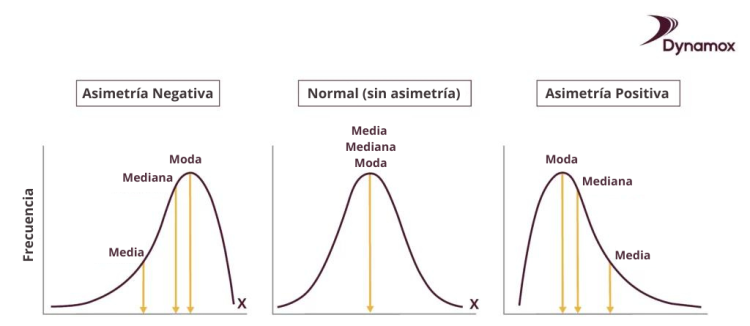

¿Que es la Kurtosis?

|Valor|           Interpretación           |
|-----|-----------------------------------|
|< -1 | Muy platicúrtica (muy achatada)   |
|-1 a 0| Platicúrtica moderada            |
|0    | Mesocúrtica (normal)              |
|0 a 1| Leptocúrtica moderada             |
|> 1  | Muy leptocúrtica (muy puntiaguda) |


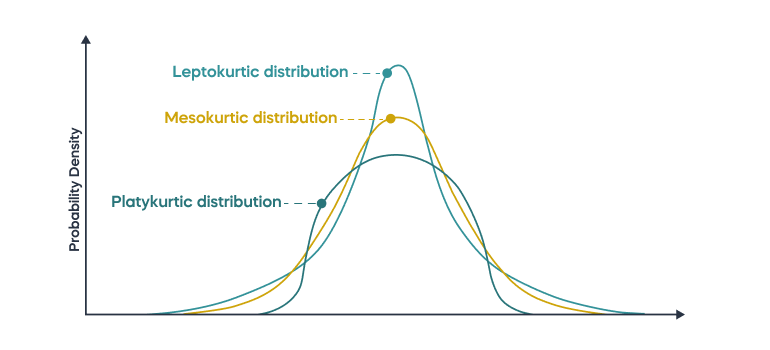

In [133]:
datos_Caunti.describe().round(2)

,precio,Acres_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
count,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00
mean,211966.71,0.50,27.92,34557.19,1754.98,55.57,3.15,0.60,1.90,7.04
std,98441.39,0.70,29.21,35021.17,619.94,10.33,0.82,0.56,0.66,2.32
min,5000.00,0.00,0.00,200.00,616.00,20.00,1.00,0.00,0.00,2.00
25%,145000.00,0.17,13.00,15100.00,1300.00,52.00,3.00,0.00,1.50,5.00
50%,189900.00,0.37,19.00,25000.00,1634.50,57.00,3.00,1.00,2.00,7.00
75%,259000.00,0.54,34.00,40200.00,2137.75,64.00,4.00,1.00,2.50,8.25
max,775000.00,12.20,225.00,412600.00,5228.00,82.00,7.00,4.00,4.50,12.00


In [ ]:
datos_Caunti.chimenea.quantile(0.9999)

# Función para generar estadísticas de variables Numéricas

In [135]:
def analisis_descriptivo(serie):
    # Medidas de tendencia central
    media = np.mean(serie)
    mediana = np.median(serie)
    #moda = stats.mode(serie)[0][0]
    
    # Medidas de dispersión
    desv_est = np.std(serie, ddof=1)  # ddof=1 para muestra
    varianza = np.var(serie, ddof=1)
    cv = (desv_est / media) * 100  # Coeficiente de variación
    rango = serie.max() - serie.min()
    
    # Medidas de posición
    cuartiles = np.percentile(serie, [0, 25, 50, 75, 100])
    rango_intercuartil = cuartiles[3] - cuartiles[1]
    
    # Medidas de forma
    asimetria = stats.skew(serie)
    curtosis = stats.kurtosis(serie)  # Fisher kurtosis (normal = 0)
    
    # Crear diccionario con todas las estadísticas
    estadisticas = {
        'Medidas de Tendencia Central': {
            'Media': media,
            'Mediana': mediana,
        },
        'Medidas de Dispersión': {
            'Desviación Estándar': desv_est,
            'Varianza': varianza,
            'Coeficiente de Variación (%)': cv,
            'Rango': rango
        },
        'Medidas de Posición': {
            'Mínimo': cuartiles[0],
            'Q1 (25%)': cuartiles[1],
            'Q2 (50%)': cuartiles[2],
            'Q3 (75%)': cuartiles[3],
            'Máximo': cuartiles[4],
            'Rango Intercuartílico': rango_intercuartil
        },
        'Medidas de Forma': {
            'Asimetría': asimetria,
            'Curtosis': curtosis
        }
    }
    
    # Convertir a DataFrame para mejor visualización
    df_stats = pd.DataFrame({
        'Estadístico': [k2 for k1 in estadisticas for k2 in estadisticas[k1].keys()],
        'Valor': [v2 for k1 in estadisticas for v2 in estadisticas[k1].values()]
    })
    
    return df_stats


#============================================ Aplicar el análisis a la variable precio ======================================================#
resultados = analisis_descriptivo(datos_Caunti['precio'])

# Formatear los resultados para mejor visualización
resultados['Valor'] = resultados['Valor'].apply(lambda x: f"{x:,.2f}")

# Mostrar resultados
print("\nEstadísticas Descriptivas para la Variable Precio:")
print("================================================")
print(resultados.to_string(index=False))


Estadísticas Descriptivas para la Variable Precio:
                 Estadístico            Valor
                       Media       211,966.71
                     Mediana       189,900.00
         Desviación Estándar        98,441.39
                    Varianza 9,690,707,465.04
Coeficiente de Variación (%)            46.44
                       Rango       770,000.00
                      Mínimo         5,000.00
                    Q1 (25%)       145,000.00
                    Q2 (50%)       189,900.00
                    Q3 (75%)       259,000.00
                      Máximo       775,000.00
       Rango Intercuartílico       114,000.00
                   Asimetría             1.58
                    Curtosis             4.18


#  Guardar las estadísticas

In [137]:
def analisis_descriptivo(serie):
    # Medidas de tendencia central
    media = np.mean(serie)
    mediana = np.median(serie)
    
    # Medidas de dispersión
    desv_est = np.std(serie, ddof=1)
    varianza = np.var(serie, ddof=1)
    cv = (desv_est / media) * 100
    rango = serie.max() - serie.min()
    
    # Medidas de posición
    cuartiles = np.percentile(serie, [0, 25, 50, 75, 100])
    rango_intercuartil = cuartiles[3] - cuartiles[1]
    
    # Medidas de forma
    asimetria = stats.skew(serie)
    curtosis = stats.kurtosis(serie)
    
    return pd.Series({
        'Media': media,
        'Mediana': mediana,
        'Desviación Estándar': desv_est,
        'Varianza': varianza,
        'Coeficiente de Variación (%)': cv,
        'Rango': rango,
        'Mínimo': cuartiles[0],
        'Q1 (25%)': cuartiles[1],
        'Q2 (50%)': cuartiles[2],
        'Q3 (75%)': cuartiles[3],
        'Máximo': cuartiles[4],
        'Rango Intercuartílico': rango_intercuartil,
        'Asimetría': asimetria,
        'Curtosis': curtosis
    })

# Crear un DataFrame con todas las estadísticas
resultados = pd.DataFrame({col: analisis_descriptivo(datos_Caunti[col]) for col in datos_Caunti.columns})



In [139]:
resultados

,precio,Acres_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
Media,2.119667e+05,0.500214,27.916088,3.455719e+04,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
Mediana,1.899000e+05,0.370000,19.000000,2.500000e+04,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
Desviación Estándar,9.844139e+04,0.698680,29.209988,3.502117e+04,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
Varianza,9.690707e+09,0.488154,853.223412,1.226482e+09,384320.089739,106.782906,0.668063,0.309250,0.433428,5.365953
Coeficiente de Variación (%),4.644191e+01,139.676161,104.634963,1.013426e+02,35.324452,18.596379,25.910528,92.398512,34.646960,32.896368
Rango,7.700000e+05,12.200000,225.000000,4.124000e+05,4612.000000,62.000000,6.000000,4.000000,4.500000,10.000000
Mínimo,5.000000e+03,0.000000,0.000000,2.000000e+02,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
Q1 (25%),1.450000e+05,0.170000,13.000000,1.510000e+04,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
Q2 (50%),1.899000e+05,0.370000,19.000000,2.500000e+04,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
Q3 (75%),2.590000e+05,0.540000,34.000000,4.020000e+04,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000


In [138]:
# # Formatear los valores numéricos
# pd.options.display.float_format = '{:,.2f}'.format

# Guardar los resultados en un archivo Excel
resultados.to_excel('../Output/estadisticas_descriptivas_NUM.xlsx')

# Mostrar los resultados
print("\nEstadísticas Descriptivas para Todas las Variables:")
print("="*100)
print(resultados)

PermissionError: [Errno 13] Permission denied: '../Output/estadisticas_descriptivas_NUM.xlsx'

## Consideraciones iniciales

## 1. PRECIO
* **Características de la distribución:**
  * Asimetría positiva fuerte (1.576)
  * Curtosis alta (4.176) - distribución leptocúrtica
  * Media ($211,967) > Mediana ($189,900) - confirma asimetría positiva
  * Coeficiente de variación: 46% - variabilidad moderada
  * Rango: $5,000 - $775,000 - gran diversidad de precios

## 2. ACRES_TOTALES
* **Características notables:**
  * Asimetría (7.18) y curtosis (78.19) extremadamente altas
  * Coeficiente de variación muy alto (139.68%)
  * Mediana: 0.37 acres
  * Valores extremos importantes (máximo 12.20 acres)
  * Distribución muy sesgada con valores atípicos

## 3. ANTIGÜEDAD
* **Aspectos principales:**
  * Asimetría positiva (2.50)
  * Curtosis alta (7.40)
  * Rango: 0 - 225 años
  * Coeficiente de variación alto (104.63%)
  * Mediana: 19 años - mayoría propiedades relativamente nuevas

## 4. PRECIO_TERRENO
* **Características clave:**
  * Asimetría muy positiva (3)
  * Curtosis muy alta (16)
  * Alta variabilidad (CV = 101%)
  * Rango: $200 - $412,600
  * Distribución muy sesgada con valores extremos altos

## 5. METROS_HABITABLES
* **Aspectos destacados:**
  * Distribución más cercana a la normal
  * Asimetría moderada (0.90)
  * Curtosis moderada (1.27)
  * Variabilidad moderada (CV = 35.32%)
  * Media (1,754.98) similar a mediana (1,634.50)
  * Rango: 616 - 5,228 metros cuadrados

## 6. UNIVERSITARIOS
* **Características únicas:**
  * Única variable con asimetría negativa (-1)
  * Distribución relativamente simétrica (curtosis = 1)
  * Menor variabilidad (CV = 19%)
  * Rango: 20% - 82% de población universitaria

## 7. DORMITORIOS
* **Aspectos principales:**
  * Distribución casi simétrica (asimetría 0.40)
  * Baja variabilidad (CV = 25.91%)
  * Media: 3.15 dormitorios
  * Rango: 1 - 7 dormitorios

## 8. CHIMENEA
* **Características:**
  * Variable binaria/categórica   ( Se puede recodificar)
  * Media: 0.60 (60% de casas tienen chimenea)
  * Asimetría moderada (0.40)
  * Alta variabilidad relativa (CV = 92.40%)

## 9. BAÑOS
* **Aspectos destacados:**
  * Asimetría ligera (0.32)
  * Curtosis negativa (-0.44) - distribución platicúrtica
  * Variabilidad moderada (CV = 34.65%)
  * Rango: 0 - 4.5 baños

## 10. HABITACIONES
* **Características principales:**
  * Distribución casi simétrica (asimetría 0.28)
  * Curtosis negativa (-0.59) - distribución platicúrtica
  * Variabilidad moderada (CV = 32.90%)
  * Media: 7.04 habitaciones

## Conclusiones Generales

1. **Variables de precio y terreno:**
   * Mayores asimetrías
   * Presencia importante de valores atípicos
   * Posible necesidad de transformación para análisis posteriores

2. **Características físicas de las casas:**
   * Distribuciones más simétricas
   * Variabilidad moderada
   * Comportamiento más cercano a la normal

3. **Variable universitarios:**
   * Comportamiento único con asimetría negativa
   * Menor variabilidad relativa
   * Distribución más homogénea

4. **Consideraciones para análisis posteriores:**
   * Evaluar transformaciones para variables con alta asimetría
   * Considerar tratamiento de valores atípicos
   * Tener en cuenta la naturaleza de la variable chimenea en análisis futuros

# Análisis Gráfico

(array([ 37., 537., 615., 300., 150.,  54.,  15.,   8.,   8.,   4.]),
 array([  5000.,  82000., 159000., 236000., 313000., 390000., 467000.,
        544000., 621000., 698000., 775000.]),
 <BarContainer object of 10 artists>)

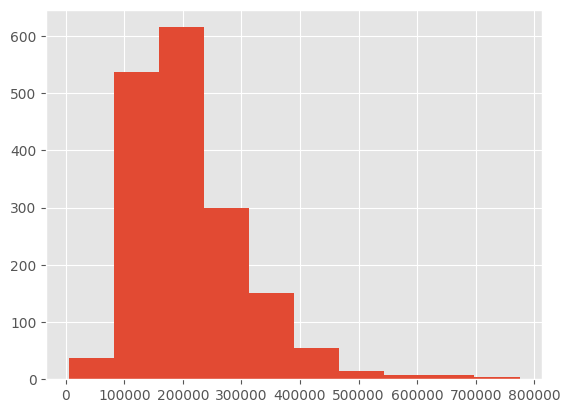

In [140]:
plt.hist(datos_Caunti['precio'])

(array([ 3.,  1.,  1.,  0.,  0.,  2.,  1., 11.,  6., 12., 22., 31., 33.,
        40., 58., 62., 66., 67., 93., 65., 77., 74., 78., 58., 68., 61.,
        42., 65., 47., 45., 31., 48., 29., 43., 25., 34., 22., 28., 28.,
        12., 27., 17., 23., 12., 16., 10., 11.,  9., 15., 10.,  5.,  9.,
         9.,  5.,  5.,  7.,  2.,  3.,  6.,  3.,  2.,  2.,  2.,  1.,  2.,
         2.,  2.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  2.,
         0.,  2.,  1.,  0.,  0.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([  5000.,  12700.,  20400.,  28100.,  35800.,  43500.,  51200.,
         58900.,  66600.,  74300.,  82000.,  89700.,  97400., 105100.,
        112800., 120500., 128200., 135900., 143600., 151300., 159000.,
        166700., 174400., 182100., 189800., 197500., 205200., 212900.,
        220600., 228300., 236000., 243700., 251400., 259100., 266800.,
        274500., 282200., 289900., 297600., 305300., 313000., 320700.,
        

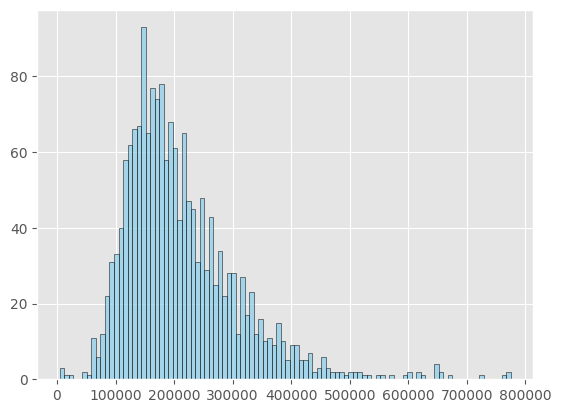

In [142]:
plt.hist(datos_Caunti['precio'], 
         bins=100,  # Número de bins
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

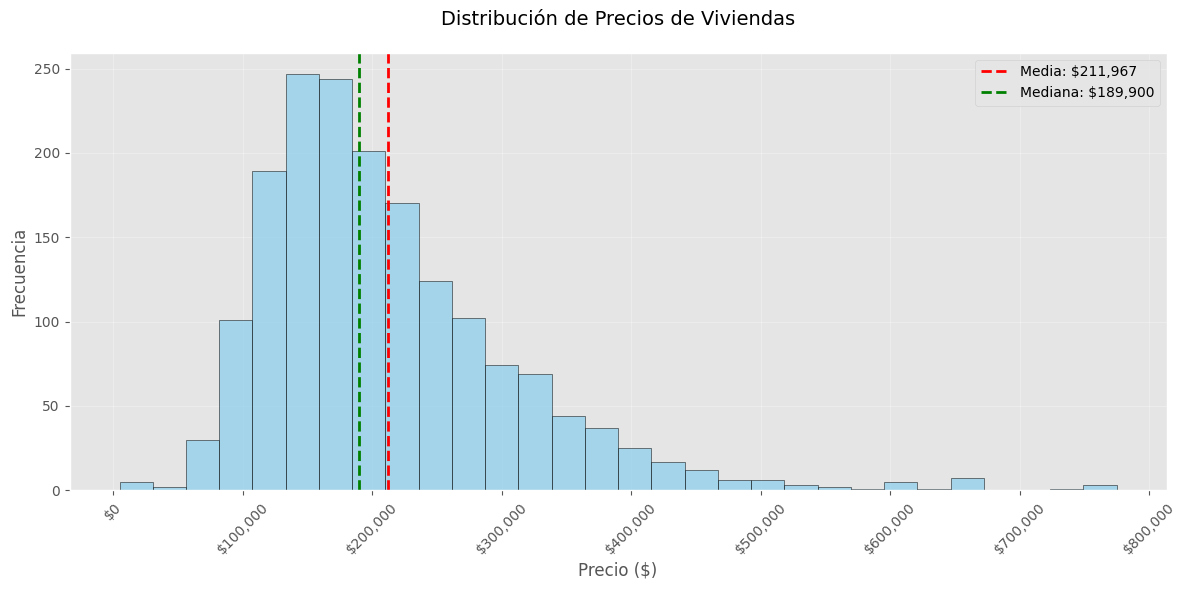

In [143]:
# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Crear el histograma
plt.hist(datos_Caunti['precio'], 
         bins=30,  # Número de bins
         color='skyblue',
         edgecolor='black',
         alpha=0.7)

# Añadir líneas verticales para estadísticas importantes
plt.axvline(datos_Caunti['precio'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: ${datos_Caunti["precio"].mean():,.0f}')
plt.axvline(datos_Caunti['precio'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: ${datos_Caunti["precio"].median():,.0f}')

# Personalizar el gráfico
plt.title('Distribución de Precios de Viviendas', pad=20, fontsize=14)
plt.xlabel('Precio ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Ajustar formato del eje x para mostrar miles con K
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=45)

# Añadir cuadrícula
plt.grid(True, alpha=0.3)

# Añadir leyenda
plt.legend()

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# El mejor Grafico

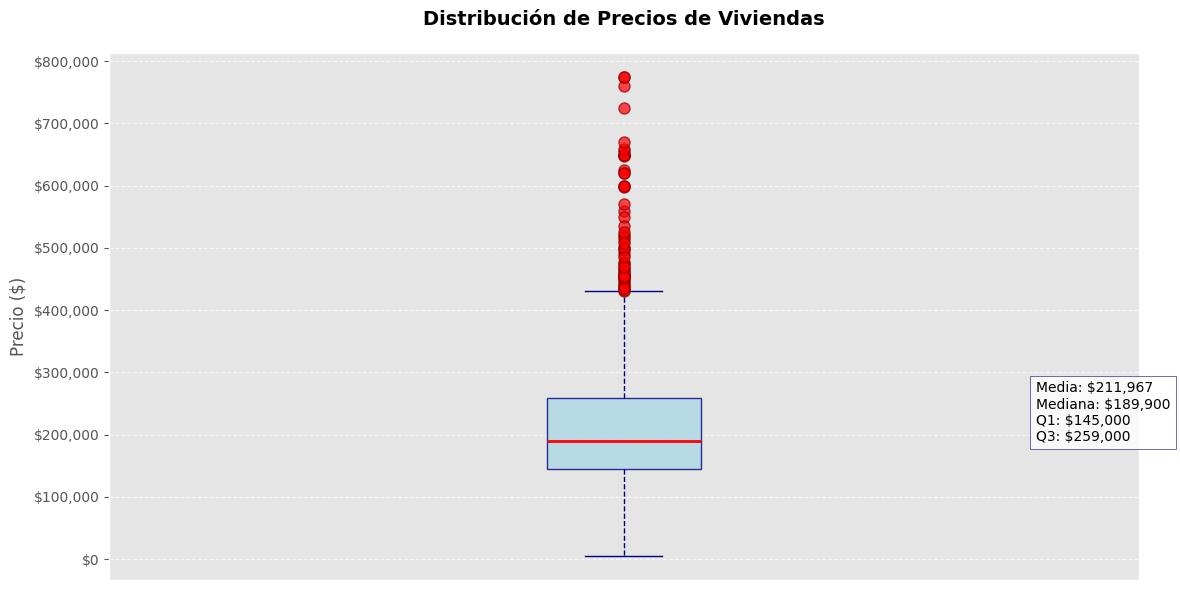

In [144]:
# Configurar el estilo
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el boxplot
bp = ax.boxplot(datos_Caunti['precio'],
                patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.8, color='navy'),
                whiskerprops=dict(color='navy', linestyle='--'),
                capprops=dict(color='navy'),
                medianprops=dict(color='red', linewidth=2),
                flierprops=dict(marker='o', 
                              markerfacecolor='red',
                              markeredgecolor='darkred',
                              markersize=8,
                              alpha=0.7))

# Personalizar el gráfico
ax.set_title('Distribución de Precios de Viviendas', 
             pad=20, 
             fontsize=14, 
             fontweight='bold')
ax.set_ylabel('Precio ($)', fontsize=12)

# Añadir grid solo en el eje y
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Formatear el eje y para mostrar los precios en miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Eliminar el eje x ya que solo tenemos una variable
ax.set_xticks([])

# Añadir un texto con estadísticas clave
stats_text = (f'Media: ${datos_Caunti["precio"].mean():,.0f}\n'
              f'Mediana: ${datos_Caunti["precio"].median():,.0f}\n'
              f'Q1: ${datos_Caunti["precio"].quantile(0.25):,.0f}\n'
              f'Q3: ${datos_Caunti["precio"].quantile(0.75):,.0f}')

plt.text(1.4, datos_Caunti["precio"].median(), 
         stats_text,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='navy'),
         fontsize=10)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Transformación de variables

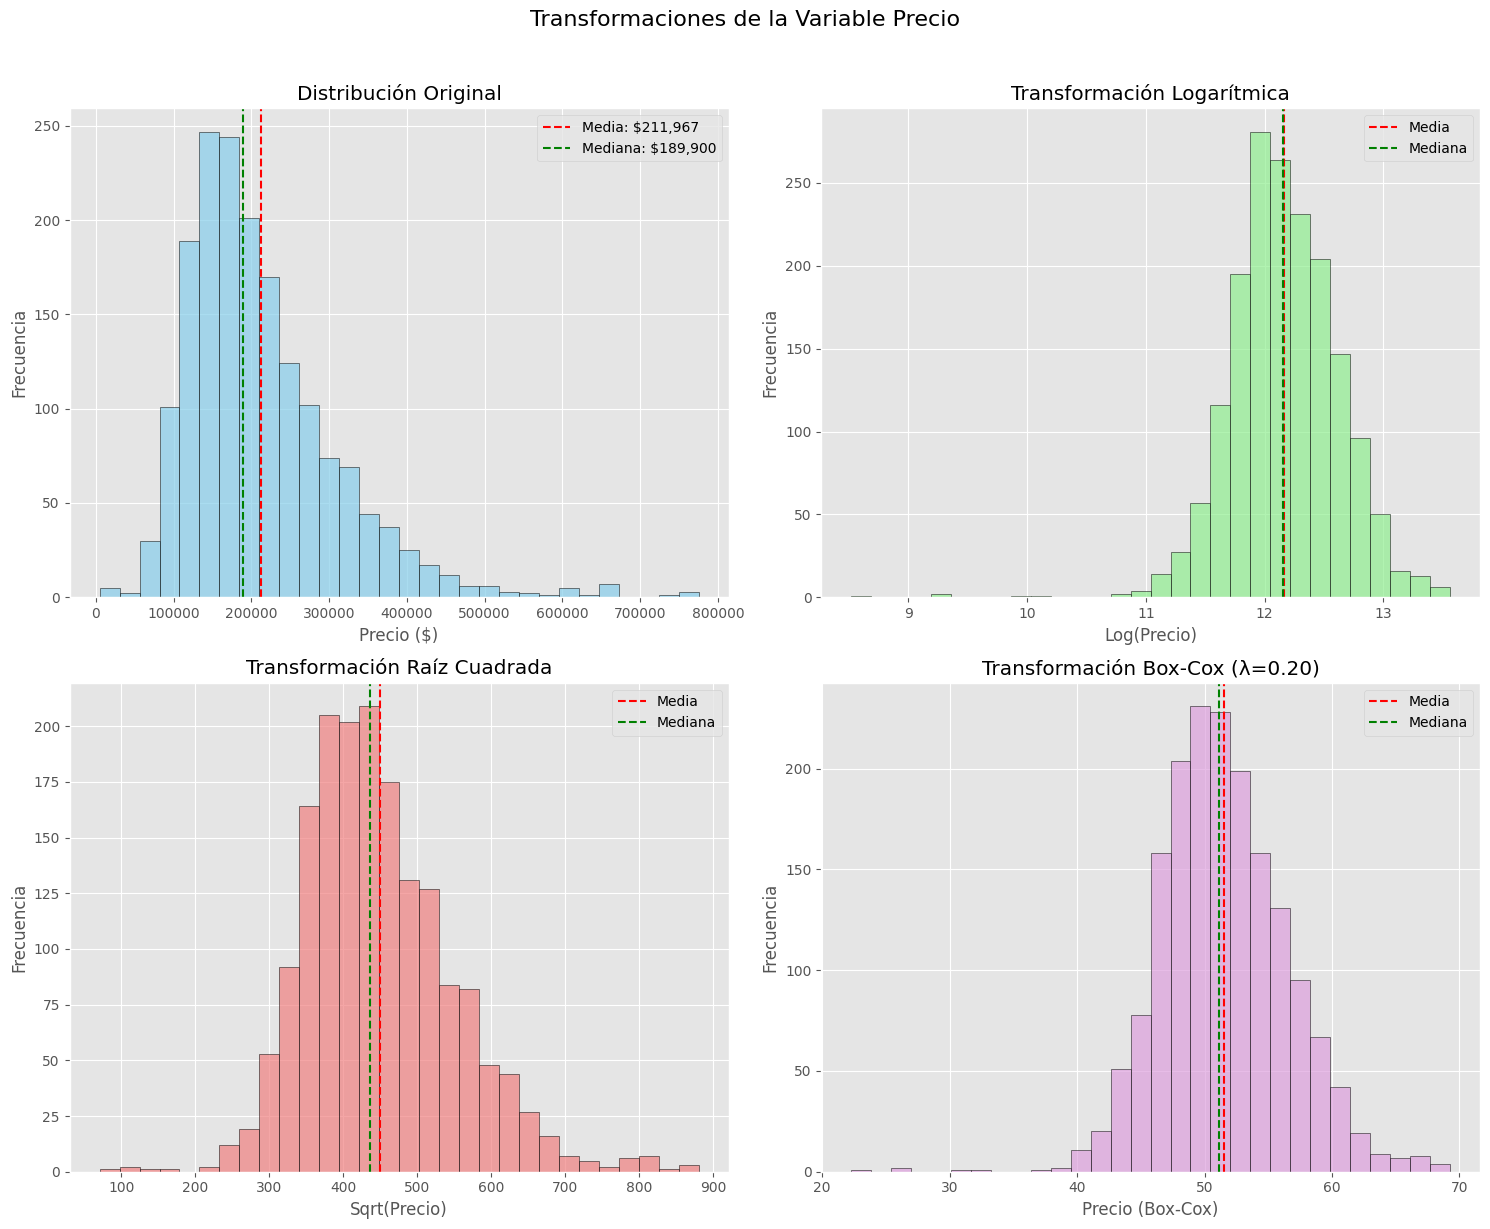


Estadísticas de Asimetría:
Original: 1.576
Logarítmica: -0.589
Raíz Cuadrada: 0.691
Box-Cox: 0.058


In [145]:
# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Transformaciones de la Variable Precio', fontsize=16, y=1.02)

# Aplanar axes para iterar más fácilmente
axes = axes.ravel()

# 1. Distribución Original
axes[0].hist(datos_Caunti['precio'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(datos_Caunti['precio'].mean(), color='red', linestyle='--', label=f'Media: ${datos_Caunti["precio"].mean():,.0f}')
axes[0].axvline(datos_Caunti['precio'].median(), color='green', linestyle='--', label=f'Mediana: ${datos_Caunti["precio"].median():,.0f}')
axes[0].set_title('Distribución Original')
axes[0].set_xlabel('Precio ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# 2. Transformación Logarítmica
axes[1].hist(np.log(datos_Caunti['precio']), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].axvline(np.log(datos_Caunti['precio']).mean(), color='red', linestyle='--', label='Media')
axes[1].axvline(np.log(datos_Caunti['precio']).median(), color='green', linestyle='--', label='Mediana')
axes[1].set_title('Transformación Logarítmica')
axes[1].set_xlabel('Log(Precio)')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

# 3. Transformación Raíz Cuadrada
axes[2].hist(np.sqrt(datos_Caunti['precio']), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[2].axvline(np.sqrt(datos_Caunti['precio']).mean(), color='red', linestyle='--', label='Media')
axes[2].axvline(np.sqrt(datos_Caunti['precio']).median(), color='green', linestyle='--', label='Mediana')
axes[2].set_title('Transformación Raíz Cuadrada')
axes[2].set_xlabel('Sqrt(Precio)')
axes[2].set_ylabel('Frecuencia')
axes[2].legend()

# 4. Transformación Box-Cox
from scipy import stats
precio_boxcox, lambda_param = stats.boxcox(datos_Caunti['precio'])
axes[3].hist(precio_boxcox, bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[3].axvline(precio_boxcox.mean(), color='red', linestyle='--', label='Media')
axes[3].axvline(np.median(precio_boxcox), color='green', linestyle='--', label='Mediana')
axes[3].set_title(f'Transformación Box-Cox (λ={lambda_param:.2f})')
axes[3].set_xlabel('Precio (Box-Cox)')
axes[3].set_ylabel('Frecuencia')
axes[3].legend()

# Ajustar layout
plt.tight_layout()
plt.show()

# Imprimir estadísticas de asimetría para cada transformación
print("\nEstadísticas de Asimetría:")
print(f"Original: {stats.skew(datos_Caunti['precio']):.3f}")
print(f"Logarítmica: {stats.skew(np.log(datos_Caunti['precio'])):.3f}")
print(f"Raíz Cuadrada: {stats.skew(np.sqrt(datos_Caunti['precio'])):.3f}")
print(f"Box-Cox: {stats.skew(precio_boxcox):.3f}")

# Gráficar todas las variables

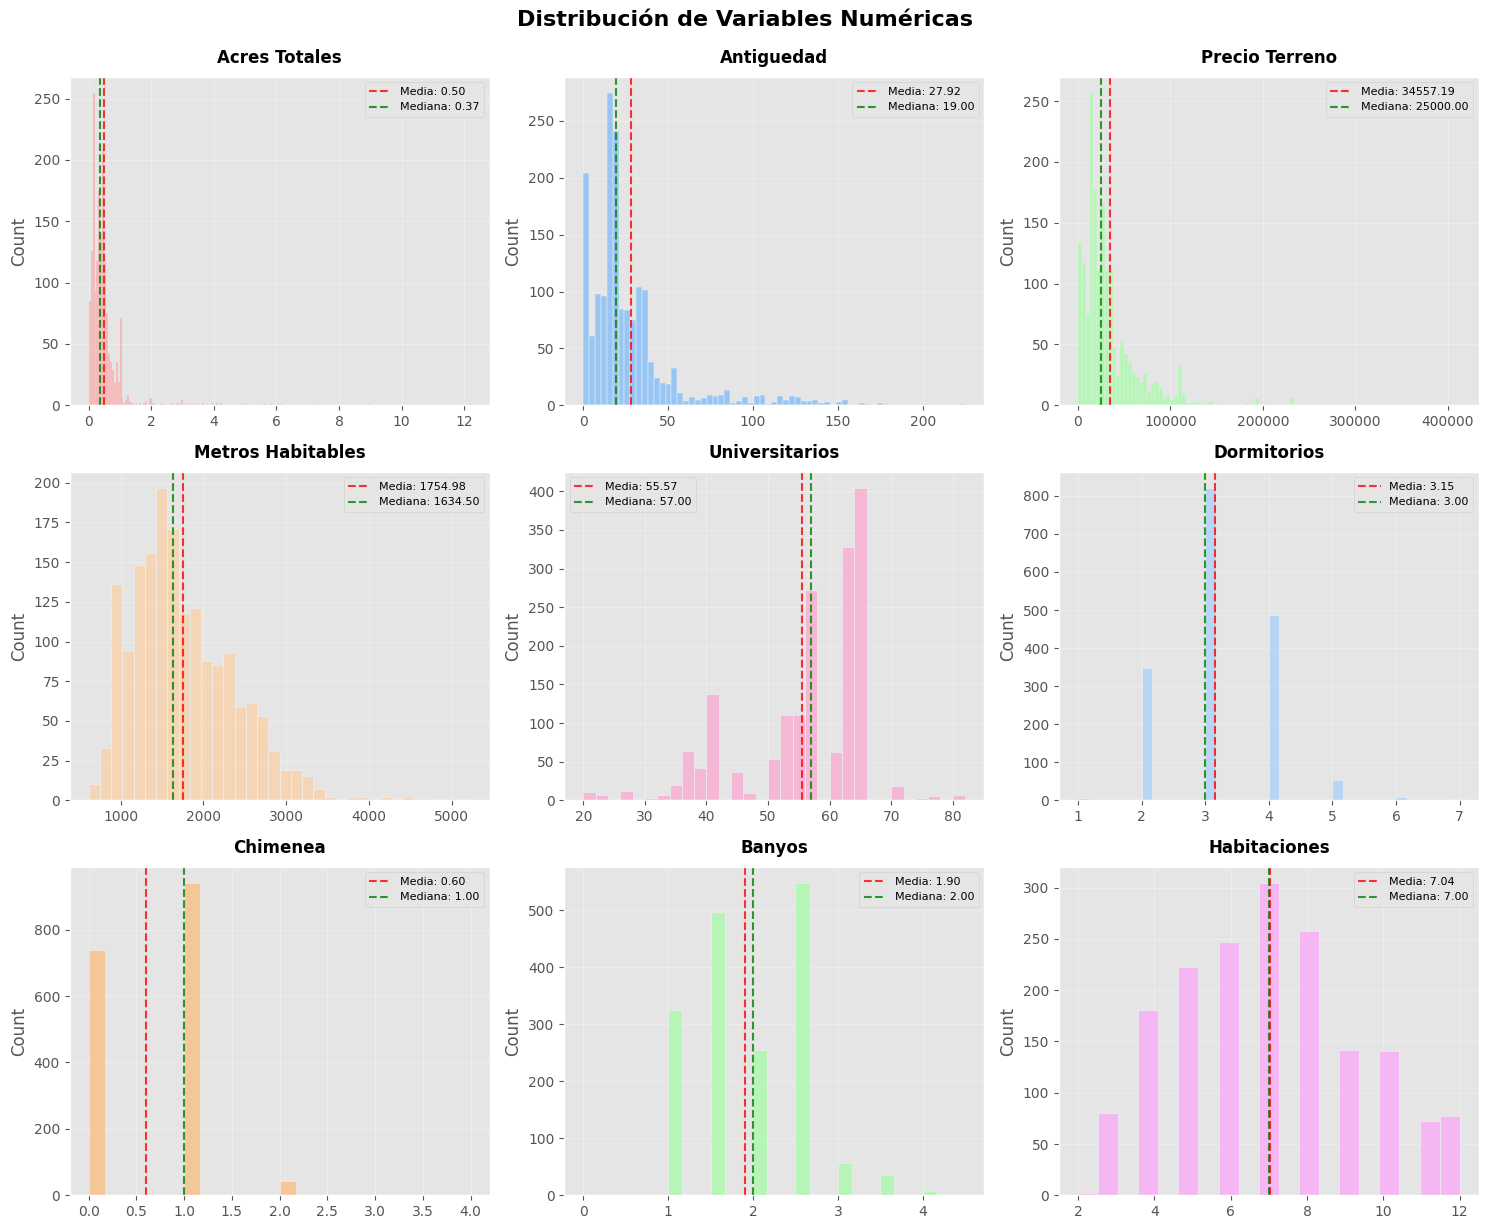

In [146]:
# Configurar el estilo

# Seleccionar variables numéricas excluyendo precio
columnas_numeric = datos_Caunti.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

# Crear subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flat

# Colores personalizados para cada gráfico
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', 
           '#99CCFF', '#FFB366', '#99FF99', '#FF99FF']

for i, columna in enumerate(columnas_numeric):
    # Crear histograma con kde
    sns.histplot(
        data=datos_Caunti,
        x=columna,
        stat="count",
        kde=False,     #-------------------------------------------------------------> Si se le quiere poner la densidad
        color=colores[i],
        line_kws={'linewidth': 2, 'color': 'darkblue'},
        alpha=0.6,
        ax=axes[i]
    )
    
    # Personalizar cada subplot
    axes[i].set_title(columna.replace('_', ' ').title(), 
                     fontsize=12, 
                     fontweight="bold", 
                     pad=10)
    axes[i].tick_params(labelsize=10)
    axes[i].set_xlabel("")
    axes[i].grid(True, alpha=0.3)
    
    # Añadir estadísticas básicas
    media = datos_Caunti[columna].mean()
    mediana = datos_Caunti[columna].median()
    
    # Añadir líneas verticales para media y mediana
    axes[i].axvline(media, color='red', linestyle='--', alpha=0.8, 
                    label=f'Media: {media:.2f}')
    axes[i].axvline(mediana, color='green', linestyle='--', alpha=0.8, 
                    label=f'Mediana: {mediana:.2f}')
    axes[i].legend(fontsize=8)

# Ajustar layout
plt.tight_layout()

# Añadir título general
fig.suptitle('Distribución de Variables Numéricas', 
             fontsize=16, 
             fontweight="bold", 
             y=1.02)

# Mostrar el gráfico
plt.show()

#### **Nota:** El reto es hacer esto pero con box plots

# Análisis de Distribuciones

### 1. PRECIO
* Confirma la fuerte asimetría positiva (cola derecha larga)
* La mayoría de las casas están concentradas entre $100,000 y $300,000
* Media ($211,967) > Mediana ($189,900), típico de distribuciones sesgadas a la derecha
* Presencia de valores atípicos altos (casas de más de $600,000)

### 2. ACRES TOTALES
* Asimetría extremadamente positiva, visible en la concentración masiva cerca de 0
* La mayoría de propiedades son pequeñas (< 2 acres)
* Pocos pero significativos valores atípicos (hasta 12 acres)
* Confirma el alto coeficiente de variación (139.68%)

### 3. ANTIGÜEDAD
* Distribución con cola derecha larga
* Alta concentración de casas nuevas (0-50 años)
* Valores atípicos de casas muy antiguas (>150 años)
* Confirma la asimetría positiva (2.50)

### 4. PRECIO TERRENO
* Similar al precio total, fuerte asimetría positiva
* Mayoría de terrenos con valores bajos
* Pocos terrenos muy caros (valores atípicos)
* Confirma la alta variabilidad (CV = 101%)

### 5. METROS HABITABLES
* Distribución más simétrica que las anteriores
* Concentración alrededor de 1,500-2,000 metros
* Menos valores atípicos extremos
* Confirma la asimetría moderada (0.90)

### 6. UNIVERSITARIOS
* Distribución multimodal
* Picos en valores específicos (40%, 50%, 60%, 70%)
* Confirma la asimetría negativa (única variable)
* Menor dispersión relativa

### 7. DORMITORIOS
* Distribución discreta con picos claros
* Mayor frecuencia en 3-4 dormitorios
* Pocos casos extremos (1 o 7 dormitorios)
* Confirma la baja variabilidad (CV = 25.91%)

### 8. CHIMENEA
* Variable binaria (0-1)
* Mayoría de casas tienen chimenea (60%)
* Algunos casos raros con más chimeneas
* Distribución típica de variable dicotómica

### 9. BAÑOS
* Distribución relativamente simétrica
* Concentración entre 1.5 y 2.5 baños
* Pocos casos extremos
* Confirma la curtosis negativa (distribución platicúrtica)

### 10. HABITACIONES
* Distribución casi simétrica
* Mayor frecuencia entre 6-8 habitaciones
* Distribución más suave que dormitorios
* Confirma la asimetría leve (0.28)

## Conclusiones Generales

1. **Asimetrías y Valores Extremos:**
  * Las variables relacionadas con precio y terreno muestran las asimetrías más pronunciadas visualmente
  * Los valores atípicos son más frecuentes en variables monetarias y de superficie

2. **Características Físicas:**
  * Las variables de características de la casa (dormitorios, baños, habitaciones) muestran distribuciones más simétricas
  * Presentan patrones más predecibles y menos valores extremos

3. **Confirmación Visual:**
  * Las gráficas confirman visualmente los hallazgos de las estadísticas descriptivas
  * Se observa clara correspondencia entre los valores numéricos y las formas de las distribuciones

4. **Consideraciones para Análisis:**
  * Se identifican claramente las variables que podrían necesitar transformaciones:
    - Precio
    - Acres totales
    - Precio terreno
  * Las variables más simétricas podrían usarse sin transformación

# Análisis de dos variables

In [147]:
# Seleccionar solo las variables numéricas
variables_numericas = datos_Caunti.select_dtypes(include=['float64', 'int'])

In [152]:
variables_numericas.corr().round(2)

,precio,Acres_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
precio,1.00,0.16,-0.19,0.58,0.71,0.20,0.40,0.38,0.60,0.53
Acres_totales,0.16,1.00,-0.02,0.06,0.16,-0.03,0.11,0.09,0.08,0.14
antiguedad,-0.19,-0.02,1.00,-0.02,-0.17,-0.04,0.03,-0.17,-0.36,-0.08
precio_terreno,0.58,0.06,-0.02,1.00,0.42,0.23,0.20,0.21,0.30,0.30
metros_habitables,0.71,0.16,-0.17,0.42,1.00,0.21,0.66,0.47,0.72,0.73
universitarios,0.20,-0.03,-0.04,0.23,0.21,1.00,0.16,0.25,0.18,0.16
dormitorios,0.40,0.11,0.03,0.20,0.66,0.16,1.00,0.28,0.46,0.67
chimenea,0.38,0.09,-0.17,0.21,0.47,0.25,0.28,1.00,0.44,0.32
banyos,0.60,0.08,-0.36,0.30,0.72,0.18,0.46,0.44,1.00,0.52
habitaciones,0.53,0.14,-0.08,0.30,0.73,0.16,0.67,0.32,0.52,1.00


In [154]:


# Calcular la matriz de correlación
matriz_corr = variables_numericas.corr()
matriz_corr

,precio,Acres_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
precio,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
Acres_totales,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.085226,0.084823,0.137604
antiguedad,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
precio_terreno,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
metros_habitables,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
universitarios,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
dormitorios,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
chimenea,0.376786,0.085226,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
banyos,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
habitaciones,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


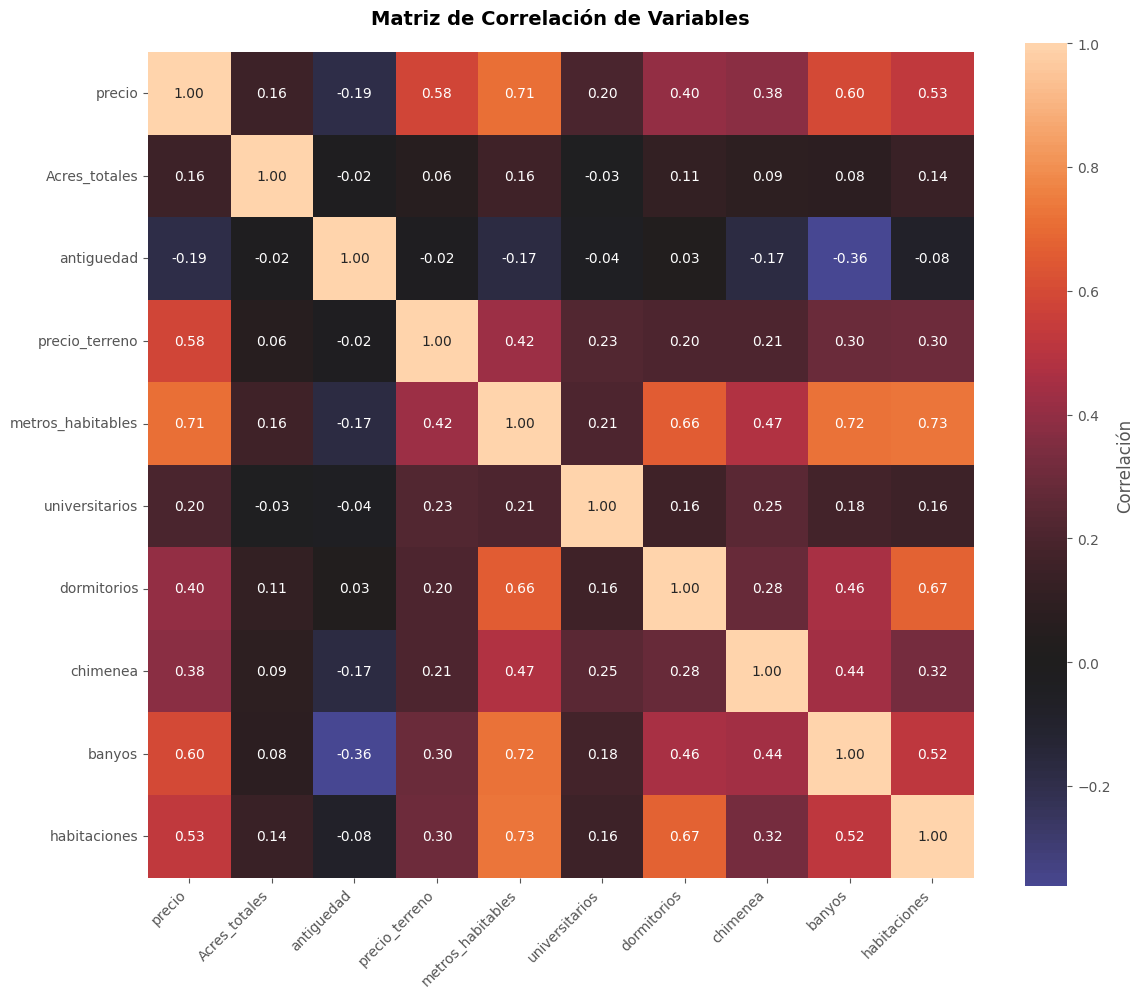


Correlaciones más fuertes con el precio:
precio               1.000000
metros_habitables    0.712390
banyos               0.597250
precio_terreno       0.581266
habitaciones         0.531170
dormitorios          0.400349
chimenea             0.376786
universitarios       0.200119
Acres_totales        0.158333
antiguedad          -0.188793
Name: precio, dtype: float64


In [153]:
# Crear la visualización
plt.figure(figsize=(12, 10))
# Crear el heatmap
sns.heatmap(matriz_corr, 
            annot=True,  # Mostrar valores
            # cmap='RdBu',  # Mapa de colores rojo-azul
            center=0,     # Centrar el mapa de colores en 0
            fmt='.2f',    # Formato de números con 2 decimales
            square=True,  # Hacer las celdas cuadradas
            cbar_kws={'label': 'Correlación'})

# Personalizar el gráfico
plt.title('Matriz de Correlación de Variables', 
          pad=20, 
          fontsize=14, 
          fontweight='bold')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# También podemos imprimir las correlaciones más fuertes con el precio
print("\nCorrelaciones más fuertes con el precio:")
correlaciones_precio = matriz_corr['precio'].sort_values(ascending=False)
print(correlaciones_precio)

## 1. Correlaciones con el Precio (Variable Objetivo)

### Correlaciones Fuertes (>0.6)
* **Metros habitables (0.71)**: La correlación más fuerte con el precio
  - Indica que casas más grandes tienden a ser más caras
  - Relación positiva y significativa
* **Baños (0.60)**: Segunda correlación más fuerte
  - Mayor número de baños asociado a precios más altos
  - Consistente con la relación de metros habitables

### Correlaciones Moderadas (0.4-0.6)
* **Precio terreno (0.58)**: Correlación moderada-alta
  - El valor del terreno influye significativamente en el precio total
* **Habitaciones (0.53)**: Correlación moderada
  - Más habitaciones asociadas a precios más altos
* **Dormitorios (0.40)**: Correlación moderada
  - Influencia positiva pero menor que habitaciones totales

### Correlaciones Débiles (<0.4)
* **Chimenea (0.38)**: Correlación débil-moderada
* **Universitarios (0.20)**: Correlación débil
* **Acres totales (0.16)**: Correlación muy débil
* **Antigüedad (-0.19)**: Correlación negativa débil
  - Casas más antiguas tienden a ser ligeramente más baratas

## 2. Otras Correlaciones Importantes

### Entre Características Físicas
* **Metros habitables - Habitaciones (0.73)**: Correlación fuerte
* **Metros habitables - Baños (0.72)**: Correlación fuerte
* **Dormitorios - Habitaciones (0.67)**: Correlación moderada-alta
* **Metros habitables - Dormitorios (0.66)**: Correlación moderada-alta

### Correlaciones Negativas
* **Antigüedad - Baños (-0.36)**: La más negativa
* **Antigüedad - Metros habitables (-0.17)**
* **Antigüedad - Chimenea (-0.17)**

## 3. Conclusiones para el Modelo

1. **Variables Más Relevantes**:
   * Metros habitables
   * Baños
   * Precio terreno
   * Habitaciones
   * Son las que más influyen en el precio

2. **Multicolinealidad Potencial**:
   * Observar la alta correlación entre metros habitables y habitaciones/baños
   * Podría ser necesario seleccionar entre variables altamente correlacionadas

3. **Variables Menos Relevantes**:
   * Acres totales
   * Universitarios
   * Tienen menor impacto en el precio

4. **Consideraciones**:
   * La antigüedad tiene un efecto negativo pero débil
   * Las características físicas están altamente interrelacionadas
   * El tamaño (metros habitables) es el factor más influyente

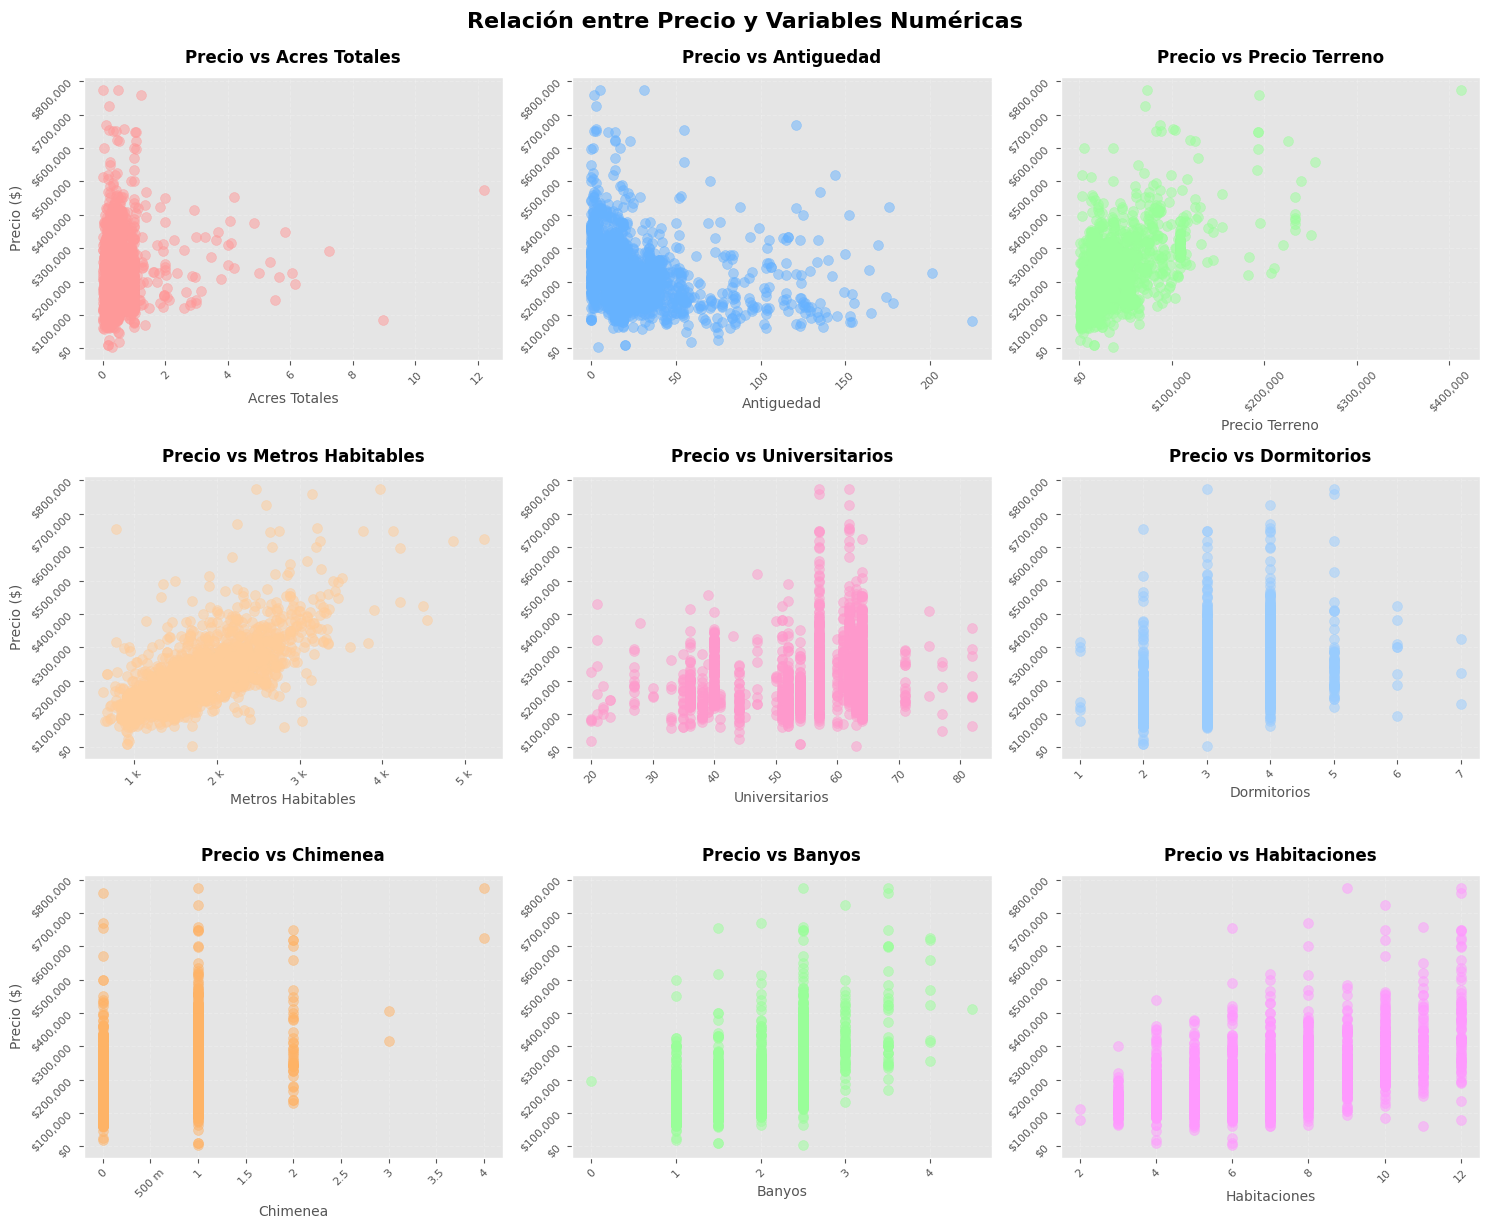

In [155]:
# Seleccionar variables numéricas excluyendo precio
columnas_numeric = datos_Caunti.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

# Crear subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flat

# Colores personalizados
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', 
           '#99CCFF', '#FFB366', '#99FF99', '#FF99FF']

# Crear los scatter plots
for i, columna in enumerate(columnas_numeric):
    # Crear scatter plot
    axes[i].scatter(
        datos_Caunti[columna],
        datos_Caunti['precio'],
        color=colores[i],
        alpha=0.5,
        s=50
    )
    
    # Personalizar cada subplot
    axes[i].set_title(f'Precio vs {columna.replace("_", " ").title()}', 
                     fontsize=12, 
                     fontweight="bold", 
                     pad=10)
    
    # Formatear ejes
    axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
    if columna in ['precio_terreno']:
        axes[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
    else:
        axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    
    # Personalizar ticks
    axes[i].tick_params(labelsize=8, rotation=45)
    
    # Añadir grid suave
    axes[i].grid(True, alpha=0.2, linestyle='--')
    
    # Etiquetas de ejes
    axes[i].set_xlabel(columna.replace("_", " ").title(), fontsize=10)
    if i % 3 == 0:  # Solo para la primera columna
        axes[i].set_ylabel('Precio ($)', fontsize=10)

# Ajustar layout
plt.tight_layout()

# Título general
fig.suptitle('Relación entre Precio y Variables Numéricas', 
             fontsize=16, 
             fontweight="bold", 
             y=1.02)

# Mostrar el gráfico
plt.show()

# Recomendaciones para Selección de Variables

## 1. Variables Altamente Recomendadas

### Metros Habitables (0.71)
* Correlación más fuerte con el precio
* Distribución relativamente simétrica
* Relación visualmente clara y positiva en el scatter plot
* Consideración: Posible multicolinealidad con habitaciones y baños

### Baños (0.60)
* Segunda correlación más fuerte
* Distribución bien definida
* Relación positiva clara con el precio
* Variable discreta pero con buena variabilidad

### Precio Terreno (0.58)
* Correlación moderada-alta
* Aunque tiene asimetría, muestra una relación clara con el precio
* Podría requerir transformación por su distribución sesgada

## 2. Variables a Considerar con Transformaciones

### Acres Totales (0.16)
* Aunque tiene baja correlación lineal
* El scatter plot sugiere una posible relación no lineal
* Necesitaría transformación por su fuerte asimetría positiva
* Recomendación: Transformación logarítmica

### Antigüedad (-0.19)
* Correlación negativa débil
* Distribución muy sesgada
* Recomendación: Considerar categorización o transformación

## 3. Variables con Consideraciones Especiales

### Habitaciones (0.53) y Dormitorios (0.40)
* Correlaciones moderadas
* Alta correlación entre ellas (0.67)
* Recomendación: Seleccionar solo una para evitar multicolinealidad

### Chimenea (0.38)
* Variable principalmente binaria
* Correlación moderada-baja
* Recomendación: Mantener como variable dummy

## 4. Variables Menos Prioritarias

### Universitarios (0.20)
* Correlación débil
* Distribución multimodal
* No muestra una relación clara con el precio
* Recomendación: Considerar excluir inicialmente

## Recomendaciones Finales

1. **Priorizar**:
   * Metros habitables
   * Baños
   * Precio terreno

2. **Transformar y Evaluar**:
   * Acres totales (log)
   * Antigüedad (categorización)

3. **Seleccionar Entre**:
   * Habitaciones o Dormitorios (no ambas)

4. **Mantener como Dummy**:
   * Chimenea

5. **Considerar Excluir**:
   * Universitarios

6. **Consideraciones Adicionales**:
   * Evaluar interacciones entre variables físicas
   * Considerar crear variables derivadas (ej: metros por habitación)
   * Validar estas recomendaciones con análisis más profundos en la fase de modelación

# Seleccionar Variables

In [156]:
# Crear el nuevo DataFrame con las variables seleccionadas
datos_seleccionados = datos_Caunti[['precio', 'metros_habitables', 'banyos', 
                                   'precio_terreno', 'Acres_totales', 'antiguedad',
                                   'habitaciones', 'chimenea']]

In [157]:
datos_seleccionados.head()

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,antiguedad,habitaciones,chimenea
0,132500,906,1.0,50000,0.09,42,5,1
1,181115,1953,2.5,22300,0.92,0,6,0
2,109000,1944,1.0,7300,0.19,133,8,1
3,155000,1944,1.5,18700,0.41,13,5,1
4,86060,840,1.0,15000,0.11,0,3,0


In [158]:
# Crear categorías para antigüedad
def categorizar_antiguedad(edad):
    if edad <= 10:
        return 'Nueva'
    elif edad <= 30:
        return 'Media'
    else:
        return 'Antigua'



In [159]:
datos_seleccionados['categoria_antiguedad'] = datos_seleccionados['antiguedad'].apply(categorizar_antiguedad)

In [160]:
datos_seleccionados.head()

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,antiguedad,habitaciones,chimenea,categoria_antiguedad
0,132500,906,1.0,50000,0.09,42,5,1,Antigua
1,181115,1953,2.5,22300,0.92,0,6,0,Nueva
2,109000,1944,1.0,7300,0.19,133,8,1,Antigua
3,155000,1944,1.5,18700,0.41,13,5,1,Media
4,86060,840,1.0,15000,0.11,0,3,0,Nueva


In [161]:

# Eliminar las variables originales que ya transformamos
datos_seleccionados = datos_seleccionados.drop(['antiguedad'], axis=1)

In [162]:
datos_seleccionados.head(2)

,precio,metros_habitables,banyos,precio_terreno,Acres_totales,habitaciones,chimenea,categoria_antiguedad
0,132500,906,1.0,50000,0.09,5,1,Antigua
1,181115,1953,2.5,22300,0.92,6,0,Nueva


In [ ]:
# Exportar a Excel
datos_seleccionados.to_excel('../Output/variables_numericas_seleccionadas.xlsx', 
                                sheet_name='Variables_Seleccionadas',
                                index=False)

In [163]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.10.0
numpy               1.26.4
pandas              2.1.4
scipy               1.11.4
seaborn             0.13.2
session_info        1.0.0
statsmodels         0.14.4
tabulate            0.9.0
-----
IPython             8.29.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
Windows-10-10.0.22631-SP0
-----
Session information updated at 2025-02-15 10:23
